In [1]:
from generate_moa_stream import run_generate_grad_stream_moa, plot_anomaly, plot_stream_drift
from util.combine_stream import get_arff_data_labels, find_anomaly_intervals
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

In [2]:
MOA_FILEPATH = '/Users/tammyz/Desktop/3H03/moa-release-2023.04.0/lib'
SOURCE_DIR = "data/benchmark/ECG"
OUTPUT_DIR = "/Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic"

In [3]:
files = os.listdir(SOURCE_DIR)
files.sort()
selected_streams = files[2:8]
anom_ints = []
for s in selected_streams:
    _, y = get_arff_data_labels(os.path.join(SOURCE_DIR,s))
    anom_ints.append(find_anomaly_intervals(y))

In [4]:
df = pd.read_csv(f'{SOURCE_DIR}/description.csv')
df.loc[df.filename.apply(lambda x: x in selected_streams)]

,filename,len,num_anomalies,total_anom_cover,avg_anomaly_len,percent_anomalies
2,MBA_ECG14046_data_10.arff,229900,107,8130,75.981308,0.035363
3,MBA_ECG14046_data_11.arff,229900,165,12746,77.248485,0.055441
4,MBA_ECG14046_data_12.arff,229900,169,14318,84.721893,0.062279
5,MBA_ECG14046_data_13.arff,229900,105,8265,78.714286,0.035950
6,MBA_ECG14046_data_14.arff,229900,128,10159,79.367188,0.044189
7,MBA_ECG14046_data_15.arff,229900,170,13066,76.858824,0.056833


In [5]:
length = 229900
n_drift = 130
p_drift = 0.40
p_drift_after = 0.5
max_stream = len(selected_streams)-1
anom_ints = anom_ints
trial_name = 'p_drift'

In [6]:
output_path, drift_label, streams, positions, seq_drift_after = run_generate_grad_stream_moa(
    selected_streams,
    p_drift, 
    n_drift, 
    length, 
    p_drift_after, 
    max_stream, 
    anom_ints,
    trial_name
)

Generating splits...
Getting divisions...
Getting order of drifts coming after anomaly...
Getting drift center positions...
Getting stream file cuts...
Creating intermediate files...
Recursively generating MOA command...
Drift filename:  ECG_grad_p8_n32_a53
Streams: [4, 0, 3, 2, 1, 2, 5, 3, 5, 3, 4, 3, 0, 3, 0, 4, 1, 0, 2, 1, 2, 3, 5, 0, 3, 0, 5, 1, 2, 0, 1, 3, 5]
Positions: [8169, 23682, 36674, 40013, 44338, 56319, 56973, 77309, 84801, 87486, 90987, 101572, 103037, 121706, 128285, 130893, 146360, 149306, 153818, 158666, 167400, 175976, 178454, 187977, 195233, 198423, 202490, 205880, 211426, 213361, 225619, 227844]
w_drift: [737, 1429, 334, 753, 116, 279, 60, 1034, 363, 858, 511, 773, 746, 129, 306, 788, 801, 763, 1288, 1202, 427, 364, 292, 212, 1205, 70, 505, 453, 121, 173, 17, 1433]
Running terminal command...



{M}assive {O}nline {A}nalysis
Version:  23.04 April 2023
Copyright: (C) 2007-2023 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 1.14s (CPU time)



Stream written to ARFF file /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/p_drift/ECG_grad_p8_n32_a53.arff
Generating drift labels...


### Plotting

In [7]:
Xs, ys = [], []
for s in selected_streams:
    X, y = get_arff_data_labels(os.path.join(SOURCE_DIR, s))
    Xs.append(X)
    ys.append(y)
df.loc[df.filename.apply(lambda x: x in selected_streams)]

,filename,len,num_anomalies,total_anom_cover,avg_anomaly_len,percent_anomalies
2,MBA_ECG14046_data_10.arff,229900,107,8130,75.981308,0.035363
3,MBA_ECG14046_data_11.arff,229900,165,12746,77.248485,0.055441
4,MBA_ECG14046_data_12.arff,229900,169,14318,84.721893,0.062279
5,MBA_ECG14046_data_13.arff,229900,105,8265,78.714286,0.035950
6,MBA_ECG14046_data_14.arff,229900,128,10159,79.367188,0.044189
7,MBA_ECG14046_data_15.arff,229900,170,13066,76.858824,0.056833


In [8]:
colours = { 
    0:'tab:blue',
    1:'tab:green',
    2:'tab:red',
    3:'tab:cyan',
    4:'tab:pink',
    5:'tab:purple',
    'drift':'tab:olive'
}

Average drift length: 579.4375
Num of anomalies:  855
Average anomaly length:  9.224561403508773
Total anomaly coverage:  7887 | Percent anomaly coverage:  0.03430622009569378
Drift anomaly coverage:  0.03742690058479532


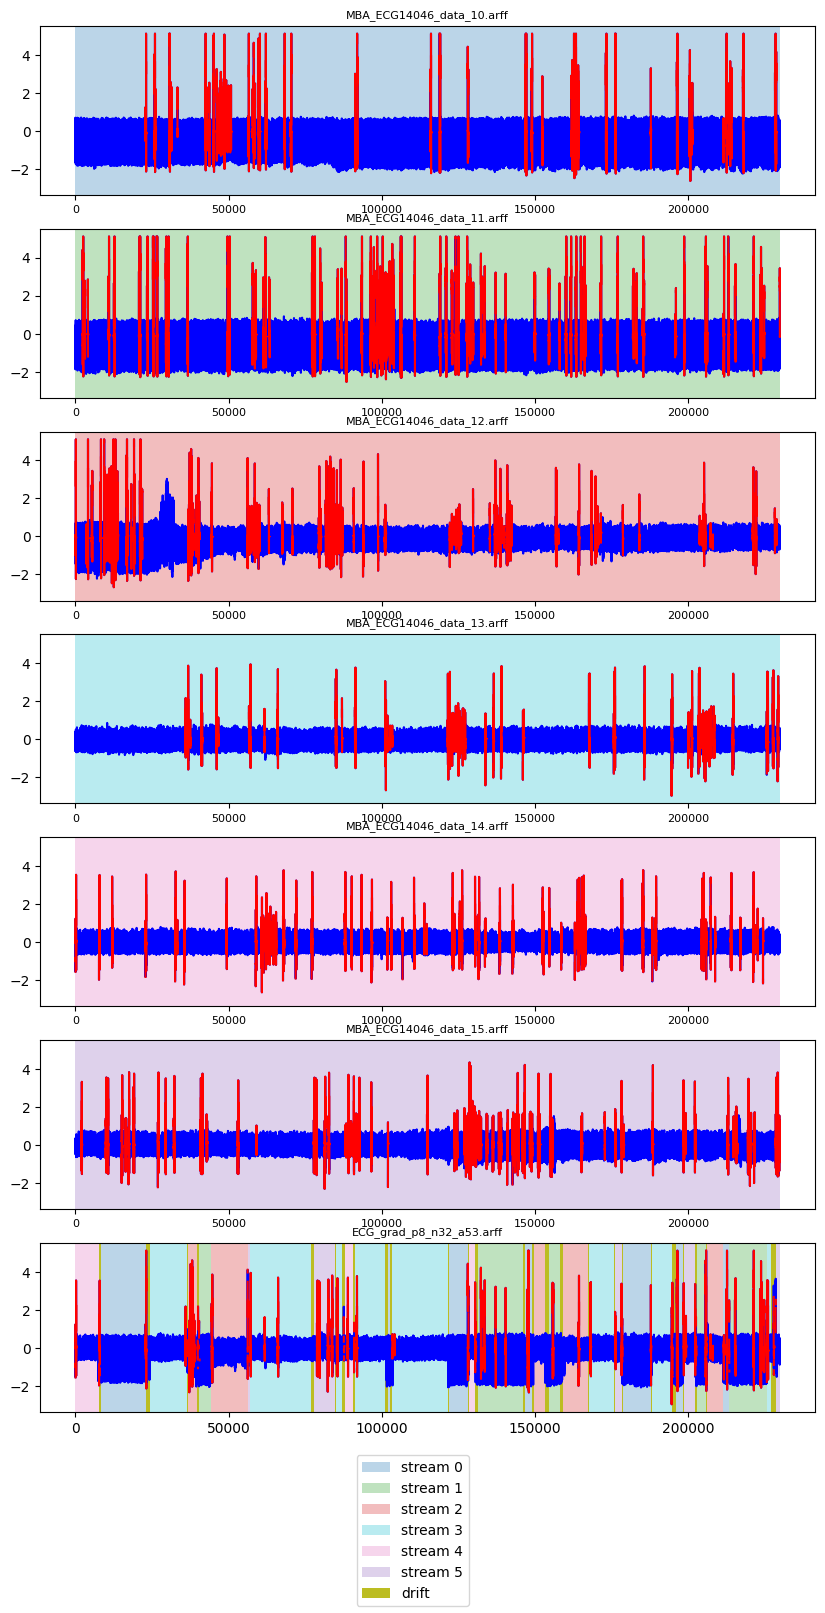

In [9]:
rows = int(len(selected_streams))
fig, ax = plt.subplots(rows + 1,1,figsize=(10,rows*3), sharey=True)

end = len(ys[0])
handles, labels = [], []
for (i,s) in enumerate(selected_streams):
    X, y = Xs[i], ys[i]
    colour = colours[i]
    plot_anomaly(X,y,ax[i],title=s,size=8)
    ax[i].axvspan(0, end, facecolor=colour, alpha=0.3, label=f'stream {i}')
    ax[i].tick_params(axis='x', labelsize=8)
    h,l = ax[i].get_legend_handles_labels()
    handles.append(h)
    labels += l
    
X, y = get_arff_data_labels(output_path)
plot_anomaly(X,y,ax[-1],title=output_path.split('/')[-1],size=8)
plot_stream_drift(positions, drift_label, streams, ax[-1], colours)
fig.legend(loc='lower center')
anom_int_plot = find_anomaly_intervals(y)
anom_lengths = [ai[1] - ai[0] for ai in anom_int_plot]
drift_ints = find_anomaly_intervals(drift_label)
drift_lengths = [dl[1] - dl[0] for dl in drift_ints]
print('Average drift length:', sum(drift_lengths)/len(drift_lengths))
print('Num of anomalies: ', len(anom_lengths))
print('Average anomaly length: ', sum(anom_lengths)/len(anom_lengths))
print('Total anomaly coverage: ', sum(anom_lengths), '| Percent anomaly coverage: ', sum(anom_lengths)/length)
print('Drift anomaly coverage: ', len(positions)/len(anom_lengths))

In [ ]:
for (i,(s,a)) in enumerate(list(zip(streams, seq_drift_after))):
    print(f'{i} - stream {s}: {"drift after" if a else "drift before"}')

True


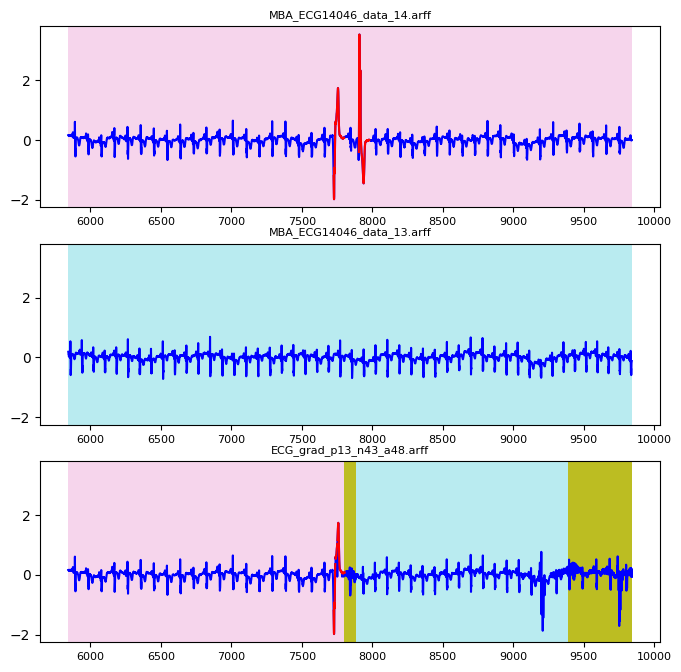

In [65]:
i = 0
p = positions[i]
w = 2000
s1, s2 = streams[i], streams[i+1]
fig, ax = plt.subplots(3,1,figsize=(8,8),sharey=True)
plot_anomaly(Xs[s1], ys[s1], ax[0], p-w, p+w, selected_streams[s1], size=8)
ax[0].axvspan(p-w, p+w, facecolor=colours[s1], alpha=0.3, label=f'stream {s1}')
plot_anomaly(Xs[s2], ys[s2], ax[1], p-w, p+w, selected_streams[s2], size=8)
ax[1].axvspan(p-w, p+w, facecolor=colours[s2], alpha=0.3, label=f'stream {s2}')
plot_stream_drift(positions, drift_label, streams, ax[2], colours, p-w, p+w)
plot_anomaly(X, y, ax[2], p-w, p+w, output_path.split('/')[-1], size=8)
print(seq_drift_after[i])
ax[0].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[2].tick_params(axis='x', labelsize=8)

False


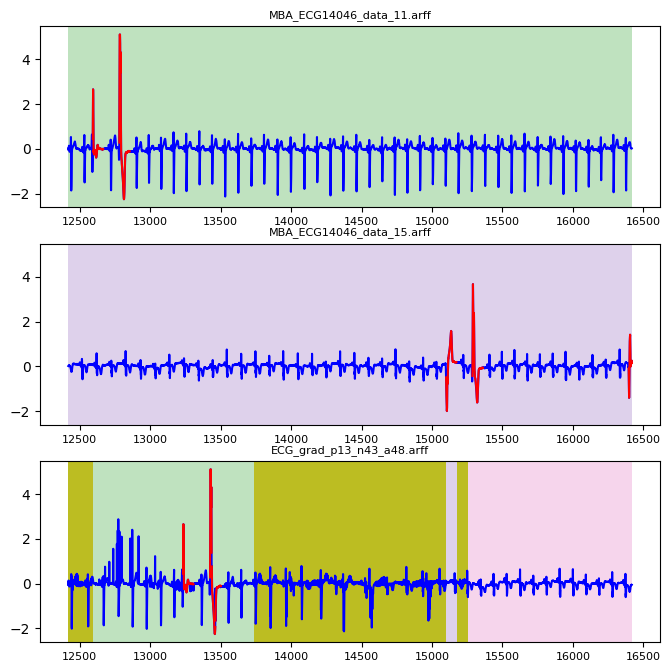

In [64]:
i = 3
p = positions[i]
w = 2000
s1, s2 = streams[i], streams[i+1]
fig, ax = plt.subplots(3,1,figsize=(8,8),sharey=True)
plot_anomaly(Xs[s1], ys[s1], ax[0], p-w, p+w, selected_streams[s1], size=8)
ax[0].axvspan(p-w, p+w, facecolor=colours[s1], alpha=0.3, label=f'stream {s1}')
plot_anomaly(Xs[s2], ys[s2], ax[1], p-w, p+w, selected_streams[s2], size=8)
ax[1].axvspan(p-w, p+w, facecolor=colours[s2], alpha=0.3, label=f'stream {s2}')
plot_stream_drift(positions, drift_label, streams, ax[2], colours, p-w, p+w)
plot_anomaly(X, y, ax[2], p-w, p+w, output_path.split('/')[-1], size=8)
print(seq_drift_after[i])
ax[0].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[2].tick_params(axis='x', labelsize=8)

False


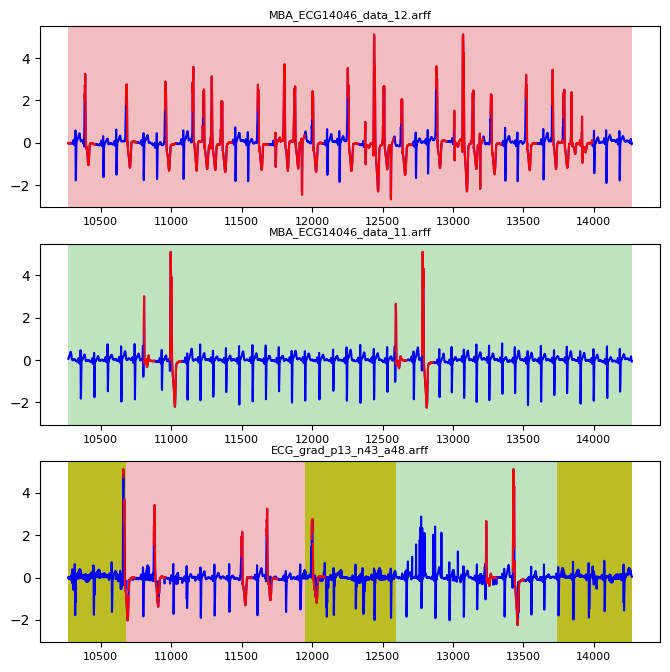

In [68]:
i = 2
p = positions[i]
w = 2000
s1, s2 = streams[i], streams[i+1]
fig, ax = plt.subplots(3,1,figsize=(8,8),sharey=True)
plot_anomaly(Xs[s1], ys[s1], ax[0], p-w, p+w, selected_streams[s1], size=8)
ax[0].axvspan(p-w, p+w, facecolor=colours[s1], alpha=0.3, label=f'stream {s1}')
plot_anomaly(Xs[s2], ys[s2], ax[1], p-w, p+w, selected_streams[s2], size=8)
ax[1].axvspan(p-w, p+w, facecolor=colours[s2], alpha=0.3, label=f'stream {s2}')
plot_stream_drift(positions, drift_label, streams, ax[2], colours, p-w, p+w)
plot_anomaly(X, y, ax[2], p-w, p+w, output_path.split('/')[-1], size=8)
print(seq_drift_after[i])
ax[0].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[2].tick_params(axis='x', labelsize=8)

False


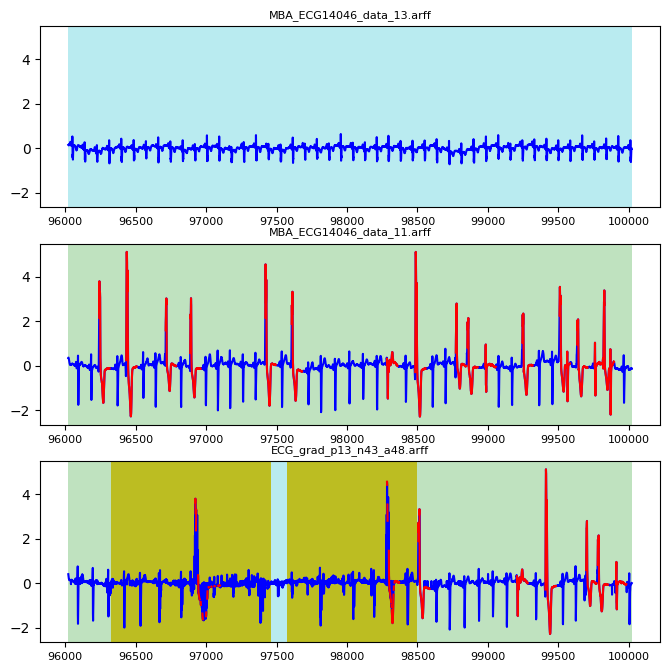

In [67]:
i = 20
p = positions[i]
w = 2000
s1, s2 = streams[i], streams[i+1]
fig, ax = plt.subplots(3,1,figsize=(8,8),sharey=True)
plot_anomaly(Xs[s1], ys[s1], ax[0], p-w, p+w, selected_streams[s1], size=8)
ax[0].axvspan(p-w, p+w, facecolor=colours[s1], alpha=0.3, label=f'stream {s1}')
plot_anomaly(Xs[s2], ys[s2], ax[1], p-w, p+w, selected_streams[s2], size=8)
ax[1].axvspan(p-w, p+w, facecolor=colours[s2], alpha=0.3, label=f'stream {s2}')
plot_stream_drift(positions, drift_label, streams, ax[2], colours, p-w, p+w)
plot_anomaly(X, y, ax[2], p-w, p+w, output_path.split('/')[-1], size=8)
print(seq_drift_after[i])
ax[0].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[2].tick_params(axis='x', labelsize=8)

True


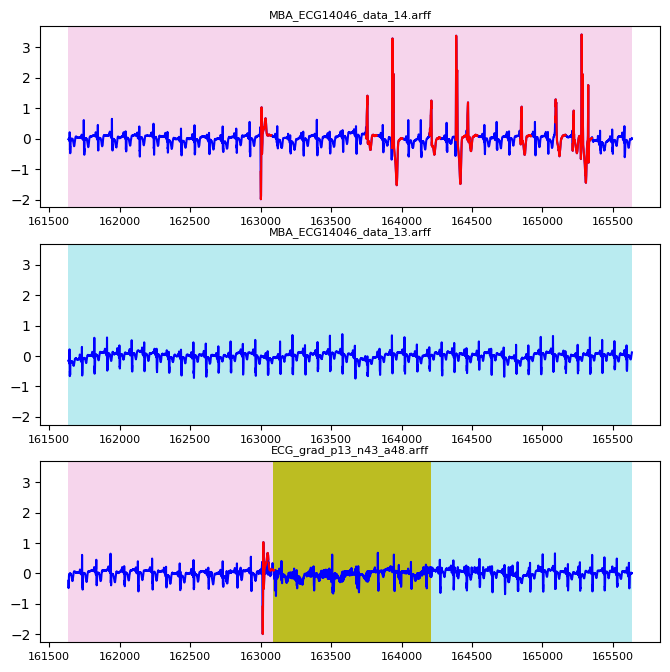

In [66]:
i = 30
p = positions[i]
w = 2000
s1, s2 = streams[i], streams[i+1]
fig, ax = plt.subplots(3,1,figsize=(8,8),sharey=True)
plot_anomaly(Xs[s1], ys[s1], ax[0], p-w, p+w, selected_streams[s1], size=8)
ax[0].axvspan(p-w, p+w, facecolor=colours[s1], alpha=0.3, label=f'stream {s1}')
plot_anomaly(Xs[s2], ys[s2], ax[1], p-w, p+w, selected_streams[s2], size=8)
ax[1].axvspan(p-w, p+w, facecolor=colours[s2], alpha=0.3, label=f'stream {s2}')
plot_stream_drift(positions, drift_label, streams, ax[2], colours, p-w, p+w)
plot_anomaly(X, y, ax[2], p-w, p+w, output_path.split('/')[-1], size=8)
print(seq_drift_after[i])
ax[0].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[2].tick_params(axis='x', labelsize=8)